In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('fct_invoice.csv')
df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [5]:
df2 = pd.read_json("dim_customer.json")
df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [7]:
df2.rename(columns = {'id':'customer_id'}, inplace= True)
df2.head()

,age,first_name,gender,customer_id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [9]:
df = df1.merge(df2, how='inner')
print(df.head())

  invoice_no  customer_id   category  quantity    price payment_method  \
0    I138884          229   Clothing         5  1500.40    Credit Card   
1    I126377          229  Cosmetics         2    81.32    Credit Card   
2    I178419          229      Shoes         3  1800.51     Debit Card   
3    I847727          229   Clothing         3   900.24    Credit Card   
4    I219251          229      Shoes         5  3000.85    Credit Card   

  invoice_date shopping_mall  age first_name gender last_name  
0     5/8/2022        Kanyon  NaN    William      M  Anderson  
1     5/4/2021     Metrocity  NaN    William      M  Anderson  
2     1/6/2021  Istinye Park  NaN    William      M  Anderson  
3   21/08/2022  Zorlu Center  NaN    William      M  Anderson  
4   23/06/2022  Istinye Park  NaN    William      M  Anderson  


# EASY

### 1. How many unique customers are in the dataset?

In [11]:
df['customer_id'].nunique()

5191

### 2. What are the different categories of products available? How many unique categories are there?

In [13]:
df['category'].unique()

array(['Clothing', 'Cosmetics', 'Shoes', 'Souvenir', 'Books',
       'Food & Beverage', 'Toys', 'Technology'], dtype=object)

In [15]:
df['category'].nunique()

8

### 3. Which payment method is the most popular? How many times was it used?

In [17]:
df['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

In [19]:
payment_method = df['payment_method'].value_counts()

payment_method.head(1)

payment_method
Cash    44447
Name: count, dtype: int64

# Medium

### 1. What are the three most popular categories, by total sales?

In [21]:
#adding a sales column 
sales = df['quantity']* df['price']
df['sales'] = sales
print(df.head(2))

  invoice_no  customer_id   category  quantity    price payment_method  \
0    I138884          229   Clothing         5  1500.40    Credit Card   
1    I126377          229  Cosmetics         2    81.32    Credit Card   

  invoice_date shopping_mall  age first_name gender last_name    sales  
0     5/8/2022        Kanyon  NaN    William      M  Anderson  7502.00  
1     5/4/2021     Metrocity  NaN    William      M  Anderson   162.64  


In [23]:
#top sales

top_sales = df.groupby('category')['sales'].sum()
sort_sales = top_sales.sort_values(ascending = False)
top_3 = sort_sales.head(3)

print(top_3)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


### 2. What are the total sales attributed to customers over the age of 45?

In [25]:
filtered_age = df[df['age'] > 45]

total_sales = filtered_age['sales'].sum()

print(total_sales)


82039768.15


### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

<function matplotlib.pyplot.show(close=None, block=None)>

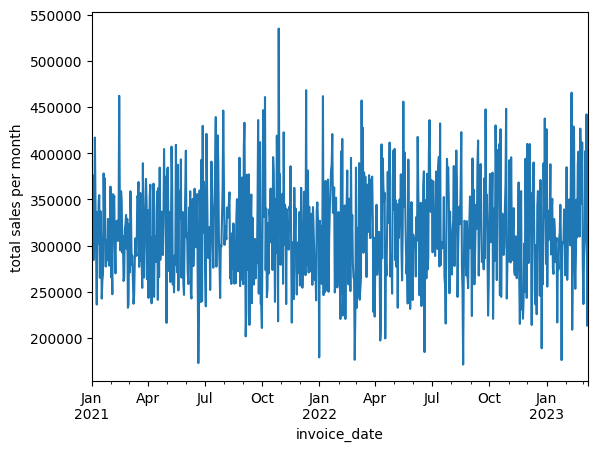

In [65]:
for fmt in ("%d/%m/%Y", "%m/%d/%Y"):
    try:
        df['invoice_date'] = pd.to_datetime(df['invoice_date'], format=fmt)
        break
    except ValueError:
        continue

df.sort_values(by='invoice_date')

df.groupby('invoice_date')['sales'].sum().plot(ylabel='total sales per month')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

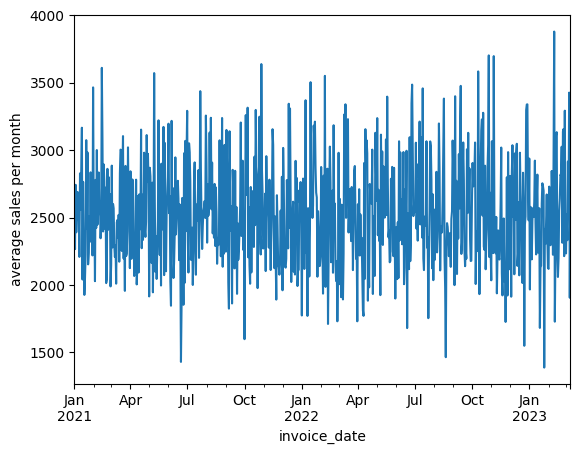

In [61]:
df.groupby('invoice_date')['sales'].mean().plot(ylabel = 'average sales per month')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

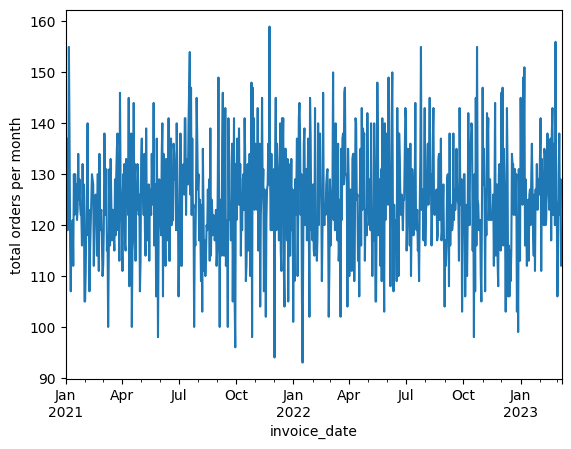

In [63]:
df.groupby('invoice_date')['sales'].count().plot(ylabel='total orders per month')
plt.show

In [ ]:
#implications: 

# Hard

### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [67]:
#define the age bins
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]  # Adjust as needed
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = df.pivot_table(index='category', columns='age_range', values='sales', aggfunc='sum', fill_value=0)

In [69]:
print(pivot_table)

age_range              0-19       20-29        30-39        40-49       50-59  \
category                                                                        
Books               7923.45    76022.70     87157.95     87885.15    72735.15   
Clothing         1144505.12  9959955.28  11540776.72  11447451.84  9943150.80   
Cosmetics          65991.18   583796.28    731310.76    682396.78   563954.20   
Food & Beverage     9434.92    68633.29     87911.07     91922.48    72132.16   
Shoes             634379.69  5571978.28   7303468.73   7163028.95  5778436.76   
Souvenir            6181.71    54438.93     63834.66     68444.55    54966.78   
Technology        739200.00  5053650.00   6298950.00   6082650.00  4458300.00   
Toys               35911.68   366392.32    424704.00    408253.44   330516.48   

age_range              60-69       70-79       80-89  90-99  
category                                                     
Books               81885.75    57706.35    29224.35    0.0  
Clo